## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from random import randrange
from PIL import Image
import random
import matplotlib.animation as animation


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras import initializers

2023-09-12 13:36:39.594105: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
from matplotlib.animation import FuncAnimation
from IPython import display
import keras_tuner as kt
from tensorflow.keras import backend as K
import matplotlib.animation as animation

In [4]:
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
tf.config.set_visible_devices([], 'GPU')

2023-09-12 13:36:44.800836: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-12 13:36:44.803430: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-09-12 13:36:44.850318: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:9e:00.0 name: Quadro P400 computeCapability: 6.1
coreClock: 1.2525GHz coreCount: 2 deviceMemorySize: 1.94GiB deviceMemoryBandwidth: 29.88GiB/s
2023-09-12 13:36:44.850366: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-09-12 13:36:44.925876: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-09-12 13:36:44.926119: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-09-12 

## Load the dataset
To start, you will train the basic autoencoder using the Fashion MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [5]:
#Importation base de données et concaténation instant t et t+dt

nom_fichier="double_pendulum"
n=6000
size=128
Bdd_train=[]
prediction_train=[]

Bdd_test=[]
prediction_test=[]
k=0
Nombre_images_voulues=5000
Nombre_fichiers=int(n/57)
indice_train=int(Nombre_fichiers*0.8)
indice_test=n


for i in range(0,indice_train):
    folder=i
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(2,57):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
        prediction_train.append(Bdd_train[len(Bdd_train)-1])
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    prediction_train.append(np.concatenate((image1,image2),axis=1))   
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(59)+".png")
    prediction_train.append(np.concatenate((image1,image2),axis=1))

print("train fait")
  
k=0

for i in range(indice_train,Nombre_fichiers):
    folder=i
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(0)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(1)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(2)+".png")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(2,57):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j)+".png")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(j+1)+".png")
        Bdd_test.append(np.concatenate((image1,image2),axis=1))
        prediction_test.append(Bdd_test[len(Bdd_test)-1])
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(57)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    prediction_test.append(np.concatenate((image1,image2),axis=1))   
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(58)+".png")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/"+str(59)+".png")
    prediction_test.append(np.concatenate((image1,image2),axis=1))

print("test fait")     
k=0





train fait
test fait


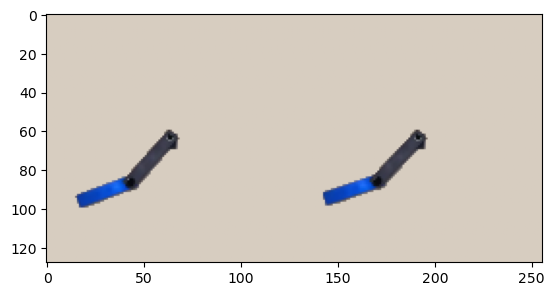

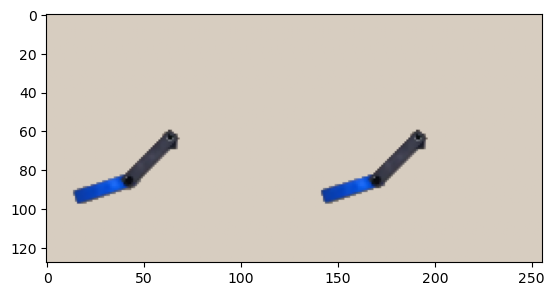

0.98039216


In [6]:
plt.imshow(Bdd_test[2])
plt.show()
plt.close()
plt.imshow(prediction_test[2])
plt.show()
plt.close()
print(np.max(Bdd_test[2]))

In [7]:
Bdd_train=np.array(Bdd_train)
Bdd_test=np.array(Bdd_test)
prediction_train=np.array(prediction_train)
prediction_test=np.array(prediction_test)


In [8]:
prediction_train.shape


(4788, 128, 256, 3)

In [8]:
del prediction_test
del prediction_train

## Encoder Decoder



Fonctions pour créer le modèle

In [19]:
def deconv_sigmoid(outch,kernel_size,stride=1,padding='same'):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  activation='sigmoid', padding='same',strides=stride),
    
    ])
    return convlayer

def deconv_relu(outch,kernel_size,stride=1,padding=1):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  padding='same',strides=stride),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
    return convlayer



In [20]:


#CONSTRUCTION DU MODELE DE DÉCODAGE
deconv_8 = deconv_relu(64,(3,4),stride=(1,2))
deconv_7 = deconv_relu(64,4,stride=2)
deconv_6 = deconv_relu(64,4,stride=2)
deconv_5 = deconv_relu(32,4,stride=2)
deconv_4 = deconv_relu(32,4,stride=2)
deconv_3 = deconv_relu(32,4,stride=2)
deconv_2 = deconv_relu(16,4,stride=2)
deconv_1 = deconv_sigmoid(3,4,stride=2)

predict_8 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_7 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_6 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_5 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_4 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_3 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_2 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')

up_sample_8 = tf.keras.Sequential([      
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(3, 4), activation='sigmoid', padding='same',strides=(1,2),use_bias=False),         
    ])

up_sample_7 =tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_6 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_5 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_4 = tf.keras.Sequential([        
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_3 = tf.keras.Sequential([         
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_2 = tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])



def minigooglenet_functional(width, height, depth, classes):
    inputShape=(height,width,depth)
    chanDim=-1
    inputs=tf.keras.layers.Input(shape=inputShape)

    deconv8_out = deconv_8(inputs)
    predict_8_out = up_sample_8(predict_8(inputs))
    x = tf.keras.layers.Concatenate(axis=3)([deconv8_out, predict_8_out])

    deconv7_out = deconv_7(x)
    predict_7_out = up_sample_7(predict_7(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv7_out, predict_7_out])


    deconv6_out = deconv_6(x)
    predict_6_out = up_sample_6(predict_6(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv6_out, predict_6_out])

    deconv5_out = deconv_5(x)
    predict_5_out = up_sample_5(predict_5(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv5_out, predict_5_out])
    
    deconv4_out = deconv_4(x)
    predict_4_out = up_sample_4(predict_4(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv4_out, predict_4_out])
    
    deconv3_out = deconv_3(x)
    predict_3_out = up_sample_6(predict_3(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv3_out, predict_3_out])
    
    deconv2_out = deconv_2(x)
    predict_2_out = up_sample_2(predict_2(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv2_out, predict_2_out]) 
    
    
    x = deconv_1(x)
    


    model=Model(inputs,x,name="Test")
    return model



Modèle (papier)

In [21]:
latent_dim =64
p_x=128
p_y=128

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(p_x, 2*p_y, 3)),
        
        tf.keras.layers.Conv2D(16, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(64, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
         tf.keras.layers.Conv2D(64, (3, 4), padding='same', strides=(1,2)),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
   
    self.decoder = minigooglenet_functional(1, 1, 64, 3)

     
        
        
        
    
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [10]:
#Importation modele
autoencoder=tf.keras.models.load_model("../Modele/Double_Pendule_22Mai")

2023-09-12 13:38:13.019365: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 13:38:13.024259: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-12 13:38:13.024320: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-09-12 13:38:13.024340: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      


In [11]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 128, 16)       784       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 128, 16)       64        
_________________________________________________________________
activation_7 (Activation)    (None, 64, 128, 16)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 128, 16)       2320      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 128, 16)       64        
_________________________________________________________________
activation_8 (Activation)    (None, 64, 128, 16)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 64, 32)      

In [23]:
epoch=400 #epoch pour l'entrainement


#Tentative de définition d'une nouvelle erreur via les CallBack

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

train_size=len(Bdd_train)
batch_size=256
initial_learning_rate = 0.0001
final_learning_rate = 0.00006
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)


optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)  

autoencoder.compile(optimizer=optimizer,loss=tf.keras.losses.MeanSquaredError())
                    


#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history=autoencoder.fit(Bdd_train,prediction_train,batch_size=256,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test,prediction_test), callbacks=[callback],
              )

Epoch 1/400
19/19 [==============================] - 50s 2s/step - loss: 0.0124 - val_loss: 0.0045
Epoch 2/400
19/19 [==============================] - 44s 2s/step - loss: 0.0063 - val_loss: 0.0043
Epoch 3/400
19/19 [==============================] - 44s 2s/step - loss: 0.0057 - val_loss: 0.0042
Epoch 4/400
19/19 [==============================] - 44s 2s/step - loss: 0.0052 - val_loss: 0.0041
Epoch 5/400
19/19 [==============================] - 44s 2s/step - loss: 0.0047 - val_loss: 0.0040
Epoch 6/400
19/19 [==============================] - 44s 2s/step - loss: 0.0045 - val_loss: 0.0040
Epoch 7/400
19/19 [==============================] - 44s 2s/step - loss: 0.0043 - val_loss: 0.0039
Epoch 8/400
19/19 [==============================] - 44s 2s/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/400
19/19 [==============================] - 44s 2s/step - loss: 0.0040 - val_loss: 0.0038
Epoch 10/400
19/19 [==============================] - 44s 2s/step - loss: 0.0040 - val_loss: 0.0038
Epoch 11/

KeyboardInterrupt: 

In [17]:
autoencoder.save("Modele/circular_motion_")

2023-06-08 05:52:56.380518: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Modele/circular_motion_/assets


In [18]:
print("Evaluate on test data")
results = autoencoder.evaluate(Bdd_test, prediction_test, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data
24/24 [==============================] - 8s 320ms/step - loss: 2.9720e-04
test loss, test acc: 0.0002971970534417778


In [25]:
encoded_imgs = autoencoder.encoder(Bdd_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
autoencoder.encoder.summary()
autoencoder.decoder.summary()
print(len(encoded_imgs))

ValueError: Layer sequential_15 expects 1 input(s), but it received 1995 input tensors. Inputs received: [<tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>, <tf.Tensor: shape=(128, 256, 3), dtype=float32, numpy=
array([[[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       ...,

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]],

       [[0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        ...,
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ],
        [0.84313726, 0.8039216 , 0.7529412 ]]], dtype=float32)>]

# LEVINA BICKEL ALGORITHM

In [11]:
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k


In [15]:
#Levina Bickel, il faut modifier le "9576" pour qu'il soit égale à la taille de la Bdd_train
encoded_imgs = autoencoder.encoder(Bdd_train).numpy()
bis=encoded_imgs.reshape(9576,64)
print(encoded_imgs.shape)
dim = intrinsic_dim_scale_interval(bis,k1=5,k2=100)
print(np.array(dim).mean())

(9576, 1, 1, 64)
4.418185


## DEUXIEME AUTO ENCODEUR

### On rajoute le reste des images

In [15]:
#Fonction custom TF (sinus)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def custom_activation(x):
  
    return (tf.math.sin(30*x))
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [12]:


Bdd_train_2=(autoencoder.encoder(Bdd_train).numpy())
Bdd_test_2=autoencoder.encoder(Bdd_test).numpy()


In [16]:
#Coefficient pour initilisation de poids
b=1/float(64)
b0=math.sqrt(6/(64))/30
b1=math.sqrt(6/(128))/30
b2=math.sqrt(6/(64))/30
b3=math.sqrt(6/(32))/30
b4=math.sqrt(6/(4))/30
#kernel_initializer=tf.keras.initializers.RandomUniform(minval=b, maxval=-b)
print(Bdd_test_2.shape)
print(Bdd_train_2.shape)

(1197, 1, 1, 64)
(4788, 1, 1, 64)


In [17]:
#Auto encodeur 2 avec latent_dim_2 le resultat approché de LevinaBickel
latent_dim_2 = 4

class Autoencoder_2(Model):
  def __init__(self, latent_dim_2):
    super(Autoencoder_2, self).__init__()
    self.latent_dim_2 = latent_dim_2
    self.encoder_2 = tf.keras.Sequential([ 
    layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b, maxval=b, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(latent_dim_2,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()),
    ])
    self.decoder_2 = tf.keras.Sequential([
        layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b4, maxval=b4, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()), 
        layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    ])
  def call(self, x):
    encoded = self.encoder_2(x)
    decoded = self.decoder_2(encoded)
    return decoded
  
  
autoencoder_2 = Autoencoder_2(latent_dim_2) 


In [18]:

epoch=1000 #epoch pour l'entrainement

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)


train_size=len(Bdd_train_2)
batch_size=512
#Tentative de définition d'une nouvelle erreur via les CallBack

initial_learning_rate = 0.0003
final_learning_rate = 0.0000015
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
    
autoencoder_2.compile(optimizer, loss=losses.MeanSquaredError())

#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history2=autoencoder_2.fit(Bdd_train_2,Bdd_train_2,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test_2, Bdd_test_2), callbacks=[callback,tensorboard_callback],
            )
              


2023-09-12 13:39:28.089692: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-09-12 13:39:28.089743: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-09-12 13:39:28.089844: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-09-12 13:39:28.122531: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-09-12 13:39:28.125760: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-09-12 13:39:28.125974: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-09-12 13:39:28.184614: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-09-12 13:39:28.202324: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


Epoch 1/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.4024

2023-09-12 13:39:29.200575: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-09-12 13:39:29.200610: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-09-12 13:39:29.217072: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-09-12 13:39:29.217264: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-09-12 13:39:29.218510: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-09-12 13:39:29.220639: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-09-12 13:39:29.226787: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/train/plugins/profile/2023_09_12_13_39_29
2023-09-12 13:39:29.229884: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped too

10/10 [==============================] - 2s 77ms/step - loss: 0.3910 - val_loss: 0.4379
Epoch 2/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.2738 - val_loss: 0.3473
Epoch 3/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.2299 - val_loss: 0.3142
Epoch 4/1000
10/10 [==============================] - 0s 20ms/step - loss: 0.2094 - val_loss: 0.2917
Epoch 5/1000
10/10 [==============================] - 0s 20ms/step - loss: 0.1916 - val_loss: 0.2735
Epoch 6/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.1763 - val_loss: 0.2582
Epoch 7/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.1649 - val_loss: 0.2427
Epoch 8/1000
10/10 [==============================] - 0s 20ms/step - loss: 0.1538 - val_loss: 0.2295
Epoch 9/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.1450 - val_loss: 0.2194
Epoch 10/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.1344 - val_loss: 0.2071
Ep

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 1, 1, 128)         8320      
_________________________________________________________________
dense_159 (Dense)            (None, 1, 1, 64)          8256      
_________________________________________________________________
dense_160 (Dense)            (None, 1, 1, 32)          2080      
_________________________________________________________________
dense_161 (Dense)            (None, 1, 1, 4)           132       
Total params: 18,788
Trainable params: 18,788
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 1, 1, 32)          160       
__________________________

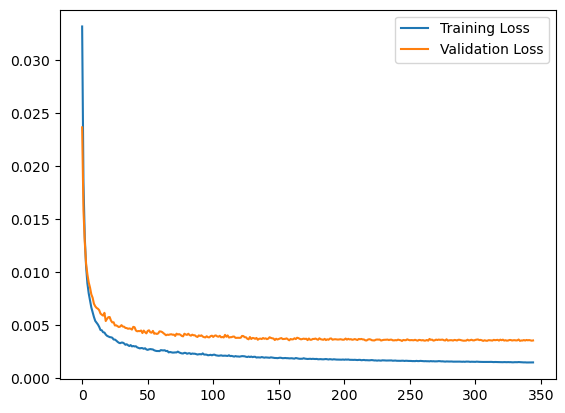

In [105]:
encoded_imgs_2 = autoencoder_2.encoder_2(Bdd_test_2).numpy()
decoded_imgs_2 = autoencoder_2.decoder_2(encoded_imgs_2).numpy()
autoencoder_2.encoder_2.summary()
autoencoder_2.decoder_2.summary()
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.legend()

# 3eme réseau : Quantitative evaluation


In [106]:
#réseau 3 avec latent_dim_2 le resultat approché de LB
latent_dim_2 = 4

class nld(Model):
  def __init__(self, latent_dim_2):
    super(nld, self).__init__()
    self.latent_dim_2 = latent_dim_2
    self.rna= tf.keras.Sequential([ 
    layers.Dense(32,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),   
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(latent_dim_2), 
        
    ])

  def call(self, x):
    encoded = self.rna(x)
    return encoded
  
Vn = nld(latent_dim_2) 

In [107]:
#Creation de notre base de données égale aux vecteurs latents de AE1
V_t = autoencoder_2.encoder_2(Bdd_train_2).numpy()

V_tpdt=autoencoder_2.encoder_2(Normalisation_bdd(autoencoder.encoder(prediction_train).numpy())).numpy()
X_train3, X_test3, y_train3, y_test3 = train_test_split(V_t, V_tpdt, test_size=0.20, random_state=17)

In [108]:
epoch=2000 #epoch pour l'entrainement

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)


train_size=len(Bdd_train_2)
batch_size=512
#Tentative de définition d'une nouvelle erreur via les CallBack

initial_learning_rate = 0.003
final_learning_rate = 0.00015
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)



optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
    
Vn.compile(optimizer, loss=losses.MeanSquaredError())

#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=300)

history3=Vn.fit(X_train3,y_train3,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=(X_test3, y_test3), callbacks=[callback],
            )
  

Epoch 1/2000
25/25 [==============================] - 1s 15ms/step - loss: 0.1833 - val_loss: 0.0735
Epoch 2/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0680 - val_loss: 0.0577
Epoch 3/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0561 - val_loss: 0.0521
Epoch 4/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0496 - val_loss: 0.0475
Epoch 5/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0461 - val_loss: 0.0457
Epoch 6/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0446 - val_loss: 0.0422
Epoch 7/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0407 - val_loss: 0.0396
Epoch 8/2000
25/25 [==============================] - 0s 9ms/step - loss: 0.0382 - val_loss: 0.0379
Epoch 9/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0372 - val_loss: 0.0367
Epoch 10/2000
25/25 [==============================] - 0s 8ms/step - loss: 0.0357 - val_loss: 0.036

KeyboardInterrupt: 

In [45]:
#Fonction des metriques : reject ratio et erreur sur les neural state variable
def rejet_ratio(X_t,X_tpdt,epsilon):
    X_i=Normalisation_bdd(autoencoder.encoder(X_t).numpy())
    V_i=autoencoder_2.encoder_2(X_i).numpy()
    Vc=Vn.rna(V_i)

    X_ip1=Normalisation_bdd(autoencoder.encoder(X_tpdt).numpy())
    V=autoencoder_2.encoder_2(X_ip1).numpy()
    
    compteur=0
    for i in range(len(V)):
        norme=np.linalg.norm(V[i])
        compteur+=1-(np.linalg.norm(V[i]-Vc[i])/norme<epsilon)

    return(compteur/len(X_t))
    

def erreur_NSV(X_t,X_tpdt):
    X_i=Normalisation_bdd(autoencoder.encoder(X_t).numpy())
    V_i=autoencoder_2.encoder_2(X_i).numpy()
    Vc=Vn.rna(V_i)

    X_ip1=Normalisation_bdd(autoencoder.encoder(X_tpdt).numpy())
    V=autoencoder_2.encoder_2(X_ip1).numpy()
    
    compteur=0
    for i in range(len(V)):
        compteur+=np.linalg.norm(V[i]-Vc[i])

    return(compteur/len(X_t))

In [47]:
#Creation du tableau des erreurs de prédictions en utilisant le premier auto-encoduer uniquement

fig = plt.figure()
ims = []
itera=57
arr=[]


decoded_finale=Bdd_test
for i in range(int(itera/2)):
    
    e1=autoencoder.encoder(decoded_finale).numpy()
    bis=autoencoder.decoder(e1)
    arr.append(erreur_NSV(decoded_finale,bis))
    decoded_finale=bis
    print(i)
    
    

plt.plot(arr)
    
    
    
    
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


<Figure size 640x480 with 0 Axes>

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


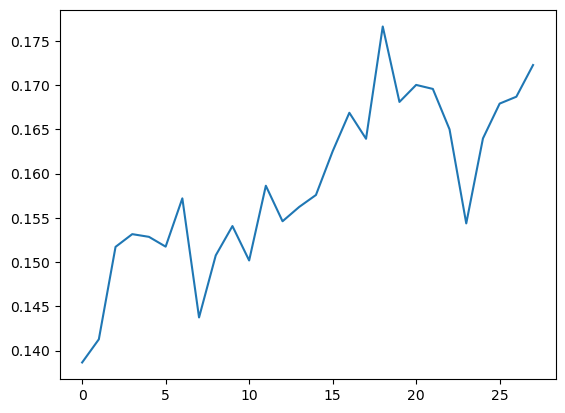

In [49]:
#Creation du tableau des erreurs de prédictions en utilisant le premier auto-encoduer et le second (stabilisation)


fig = plt.figure()
ims = []
itera=57
arr2=[]


decoded_finale=Bdd_test
for i in range(int(itera/2)):
    
    e1=autoencoder.encoder(decoded_finale).numpy()
    oui=Normalisation_bdd(e1)
    e2=autoencoder_2.encoder_2(oui).numpy()
    e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
    bis=autoencoder.decoder(e3)
    arr2.append(erreur_NSV(decoded_finale,bis))
    decoded_finale=bis
    print(i)
    
    
plt.plot(arr2)
    

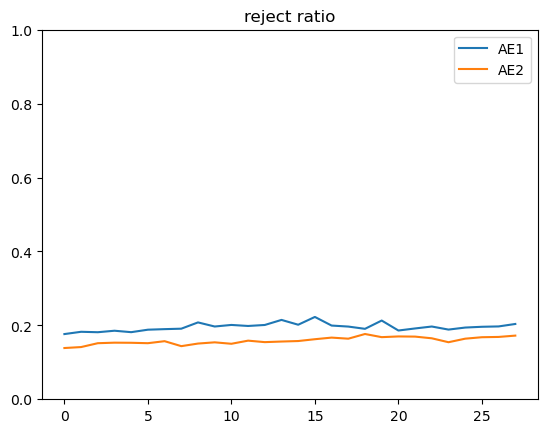

In [52]:
plt.plot(arr,label='AE1')
plt.plot(arr2,label='AE2')
plt.ylim(0,1)
plt.title("reject ratio")
plt.legend()
plt.show()

In [41]:
autoencoder_2.save("Modele/AE2_23Mai")
Vn.save("Modele/NN3_23Mai")

INFO:tensorflow:Assets written to: Modele/AE2_23Mai/assets


INFO:tensorflow:Assets written to: Modele/AE2_23Mai/assets


INFO:tensorflow:Assets written to: Modele/NN3_23Mai/assets


INFO:tensorflow:Assets written to: Modele/NN3_23Mai/assets


# IMPRESSION RESULTAT

In [19]:
#Choix du numero de la simulation

phenomene=random.randint(0,50)
#phenomene=33
print(phenomene)

31


Affichage des résultats : ground truth, court terme, long terme naive, long terme stabilisation, long terme hybridation

MovieWriter ffmpeg unavailable; using Pillow instead.


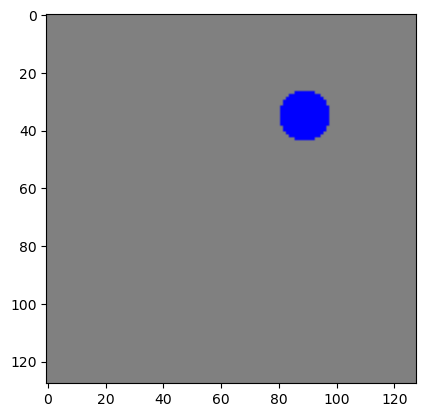

In [20]:
#Ground Truth
fig = plt.figure()
ims = []
IMS1=[]
separate_test=np.array([np.split(Bdd_test[57*phenomene+i],2,axis=1) for i in range(0,60)])
for i in range(57):
    im = plt.imshow(separate_test[i,0], animated=True)
    ims.append([im])
    IMS1.append([separate_test[i,0]])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10000)

ani.save('Animation/ground_truth/dynamic_images.gif')

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


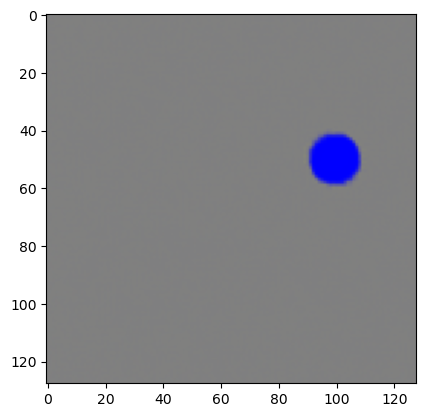

In [21]:
#Proche en proche 
fig = plt.figure()
ims2 = []
IMS_PEP=[]
itera=57
e1=autoencoder.encoder(Bdd_test[57*phenomene:57*(phenomene+1)]).numpy()
decoded_finale=autoencoder.decoder(e1)
split=np.split(Bdd_train[57*phenomene+2*0],2,axis=1)
im=plt.imshow(split[0],animated=True)
ims2.append([im])
IMS_PEP.append([split[0]])
im=plt.imshow(split[1],animated=True)
ims2.append([im])
IMS_PEP.append([split[1]])
            
for i in range(int(57)):
    split=np.split(decoded_finale[i],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims2.append([im])
    IMS_PEP.append([split[1]])
    
ani = animation.ArtistAnimation(fig, ims2, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/PeP/dynamic_images.gif')

plt.show()

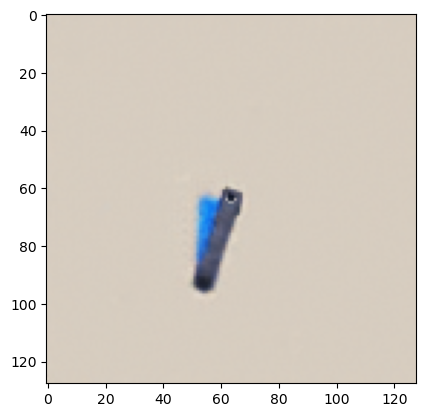

In [109]:
#Proche en proche NSV
fig = plt.figure()
ims2 = []
IMS_PEP=[]
itera=57
e1=autoencoder.encoder(Bdd_test[57*phenomene:57*(phenomene+1)]).numpy()
oui=Normalisation_bdd(e1)
e2=autoencoder_2.encoder_2(oui).numpy()
e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
decoded_finale=autoencoder.decoder(e3)
split=np.split(Bdd_train[57*phenomene+2*0],2,axis=1)
im=plt.imshow(split[0],animated=True)
ims2.append([im])
IMS_PEP.append([split[0]])
im=plt.imshow(split[1],animated=True)
ims2.append([im])
IMS_PEP.append([split[1]])
            
for i in range(int(57)):
    split=np.split(decoded_finale[i],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims2.append([im])
    IMS_PEP.append([split[1]])

    
ani = animation.ArtistAnimation(fig, ims2, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/PeP_NSV/dynamic_images.gif')

plt.show()

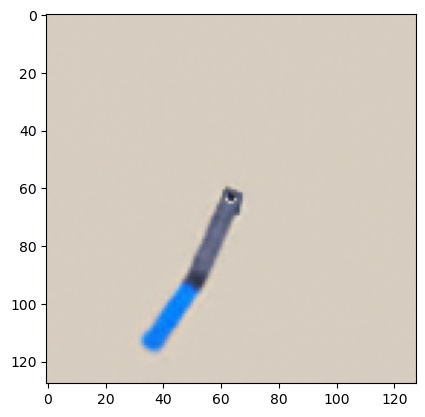

In [131]:
#AE1 ligne 1

fig = plt.figure()
ims = []
itera=57

decoded_finale=Bdd_test[57*phenomene:57*phenomene+1]
for i in range(int(itera/2)):
    split=np.split(decoded_finale[0],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims.append([im])
    im=plt.imshow(split[1],animated=True)
    ims.append([im])
    e1=autoencoder.encoder(decoded_finale).numpy()
    #oui=Normalisation_bdd(e1)
    #e2=autoencoder_2.encoder_2(oui).numpy()
    #e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
    decoded_finale=autoencoder.decoder(e1)
    
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/AE1/dynamic_images.gif')
    

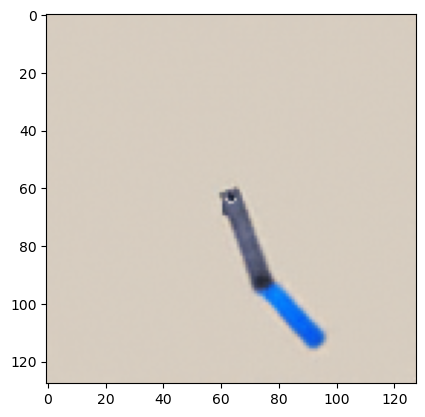

In [136]:
#Stabilisation

fig = plt.figure()
ims = []
itera=57

decoded_finale=Bdd_test[57*phenomene:57*phenomene+2]
for i in range(int(itera/2)):
    split=np.split(decoded_finale[0],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims.append([im])
    im=plt.imshow(split[1],animated=True)
    ims.append([im])
    e1=autoencoder.encoder(decoded_finale).numpy()
    oui=Normalisation_bdd(e1)
    e2=autoencoder_2.encoder_2(oui).numpy()
    e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
    decoded_finale=autoencoder.decoder(e3)
    
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/stabilisation/dynamic_images.gif')
    

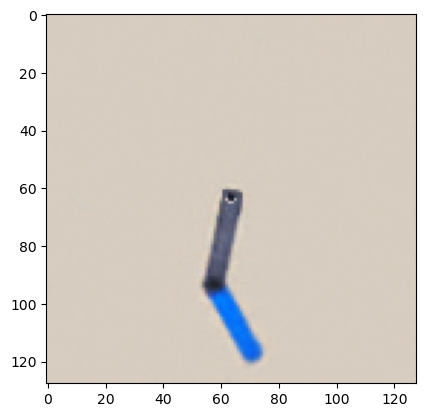

In [128]:
#hybridation
fig = plt.figure()
ims = []
itera=57
decoded_finale=Bdd_test[57*phenomene:57*phenomene+2]
for i in range(int(itera/2)):
    split=np.split(decoded_finale[0],2,axis=1)
    im=plt.imshow(split[0],animated=True)
    ims.append([im])
    im=plt.imshow(split[1],animated=True)
    ims.append([im])
    
    if((i+1)%2==0):
        e1=autoencoder.encoder(decoded_finale).numpy()
        oui=Normalisation_bdd(e1)
        e2=autoencoder_2.encoder_2(oui).numpy()
        e3=Denormalisation_bdd(autoencoder_2.decoder_2(e2).numpy(),e1)
        decoded_finale=autoencoder.decoder(e3)
    else:
        e1=autoencoder.encoder(decoded_finale).numpy()
        decoded_finale=autoencoder.decoder(e1)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('Animation/hybrid/dynamic_images.gif')
        